In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
M = pd.read_csv("train (1).csv")
test_set = pd.read_csv("test (2).csv")

In [52]:
M.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [53]:
print(M.shape) # Verifying dimensions

(14396, 18)


In [54]:
print(test_set.shape) # Verifying dimensions

(3600, 17)


In [55]:
M.info() # The are columns with nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [56]:
Id = M.Id
M = M.drop("Id",axis=1)

In [57]:
m = M.isna() # True for NAN, False for anything else
print(np.sum(m,axis=0)) # SUMS all trues to find the amount of nulls in each column

Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64


In [58]:
# Imputation by mean will be done
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy="median")

M[['Popularity', 'key', 'instrumentalness']] = imputer.fit_transform(M[['Popularity', 'key', 'instrumentalness']])

# To stay consistent the same imputer object that was fit to the features of the train set will be used on the test set
test_set[['Popularity', 'key', 'instrumentalness']] = imputer.transform(test_set[['Popularity', 'key', 'instrumentalness']])

In [59]:
#duplicates?
M.duplicated().sum()

np.int64(0)

In [60]:
M = M.drop_duplicates()

In [61]:
M.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,44.513059,0.543105,0.662422,5.958947,-7.900852,0.640247,0.080181,0.246746,0.135278,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,17.216466,0.165517,0.235967,3.015909,4.057362,0.479944,0.085157,0.310922,0.274652,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.508000,4.000000,-9.538000,0.000000,0.034800,0.004280,0.000295,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,56.000000,0.658000,0.861000,8.000000,-5.162000,1.000000,0.083100,0.432250,0.057600,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


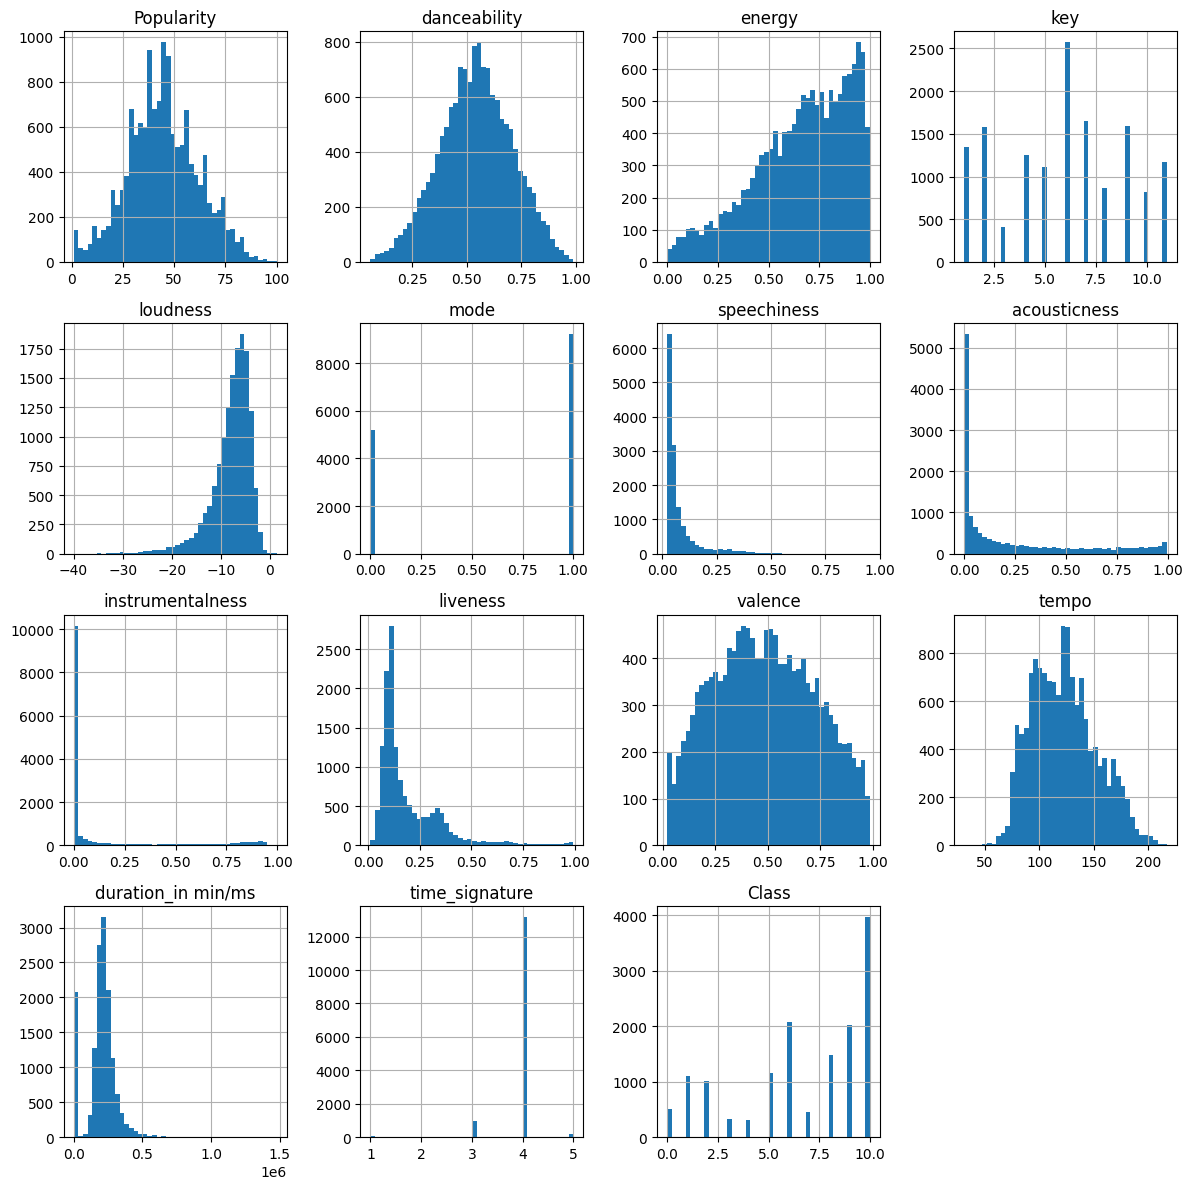

<Figure size 640x480 with 0 Axes>

In [62]:
# checking distributions
M.hist(figsize=(12,12), bins=44)
plt.tight_layout()
plt.show()
plt.clf()

In [63]:
# What do you understand from this? what do you do with skewed data?

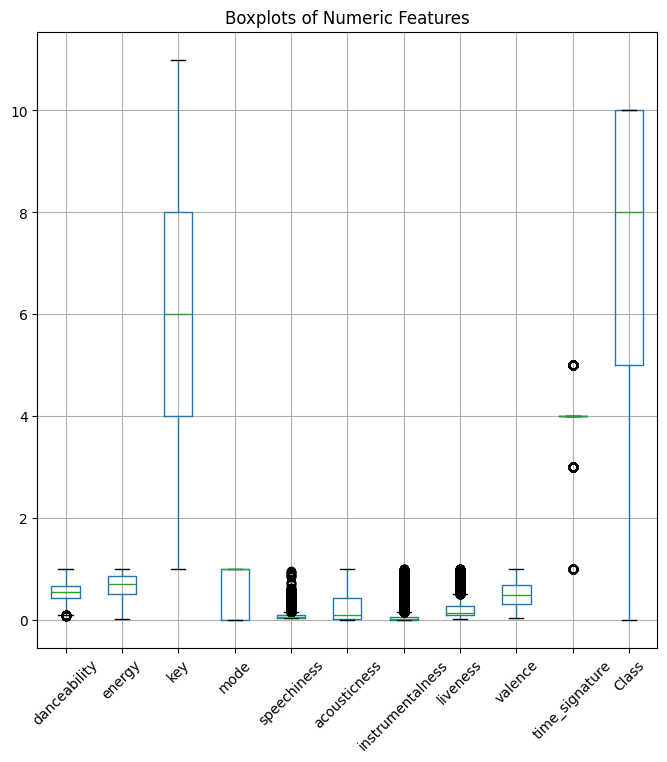

<Figure size 640x480 with 0 Axes>

In [64]:
# checking for outliers using boxplots
M.drop(["duration_in min/ms","Popularity","tempo",'loudness'],axis=1).boxplot(figsize=(8,8))
plt.xticks(rotation=45)
plt.title('Boxplots of Numeric Features')
plt.show()
plt.clf()

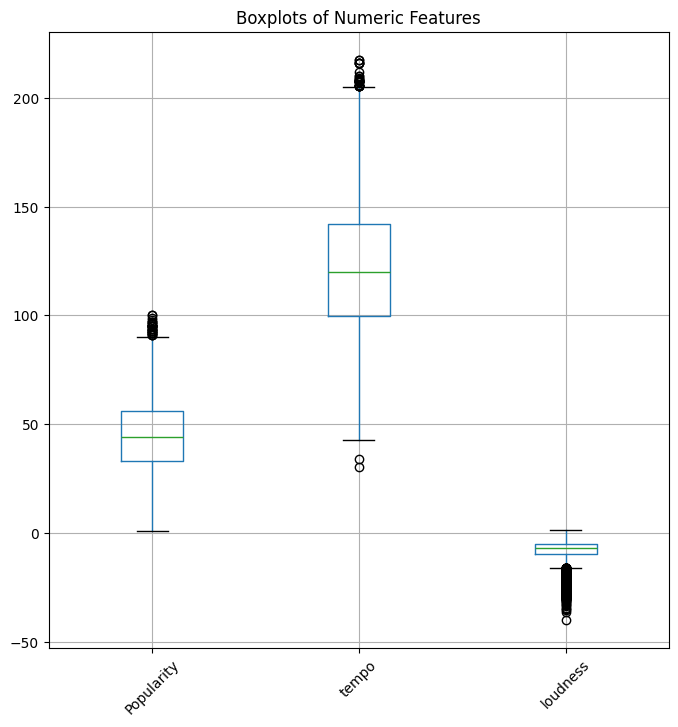

<Figure size 640x480 with 0 Axes>

In [65]:
M[["Popularity","tempo",'loudness']].boxplot(figsize=(8,8))
plt.xticks(rotation=45)
plt.title('Boxplots of Numeric Features')
plt.show()
plt.clf()

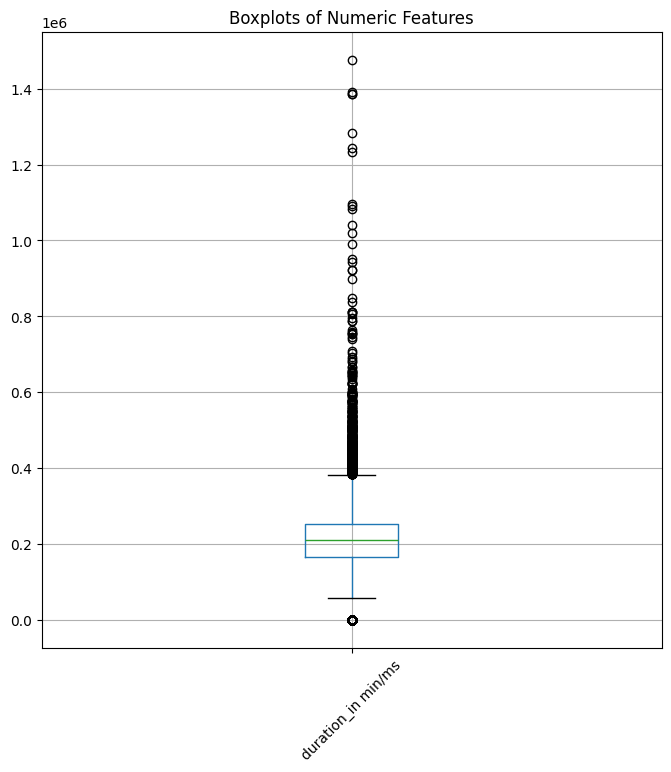

<Figure size 640x480 with 0 Axes>

In [66]:
M[["duration_in min/ms"]].boxplot(figsize=(8,8))
plt.xticks(rotation=45)
plt.title('Boxplots of Numeric Features')
plt.show()
plt.clf()

In [67]:
# Capping the duration feature to reduce outliers

def cap_values(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR 
    upper_bound = Q3 + 2 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound) # Applying the capping here
    return lower_bound, upper_bound # to apply on the test set

lb, up = cap_values(M,'duration_in min/ms')

test_set['duration_in min/ms'] = np.clip(test_set['duration_in min/ms'], lb, up)

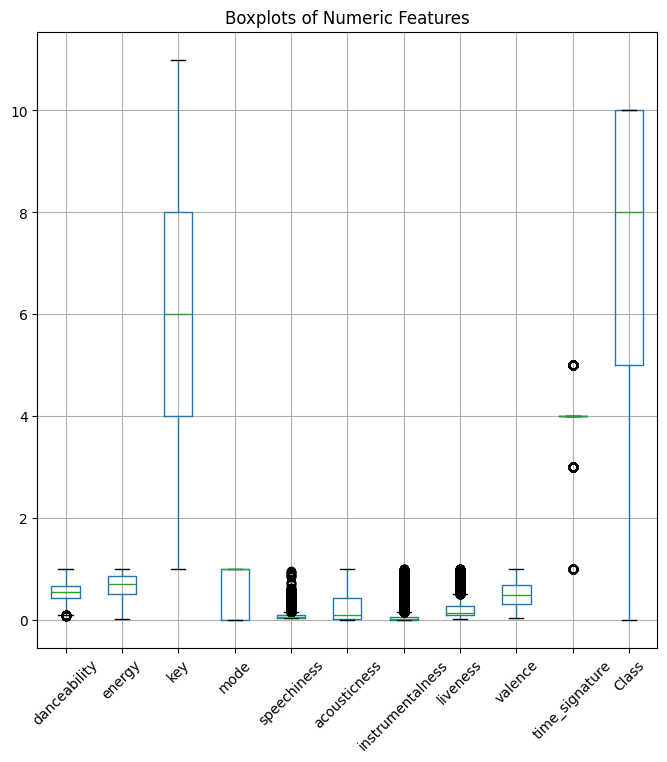

<Figure size 640x480 with 0 Axes>

In [68]:
# checking for outliers using boxplots
M.drop(["duration_in min/ms","Popularity","tempo",'loudness'],axis=1).boxplot(figsize=(8,8))
plt.xticks(rotation=45)
plt.title('Boxplots of Numeric Features')
plt.show()
plt.clf()

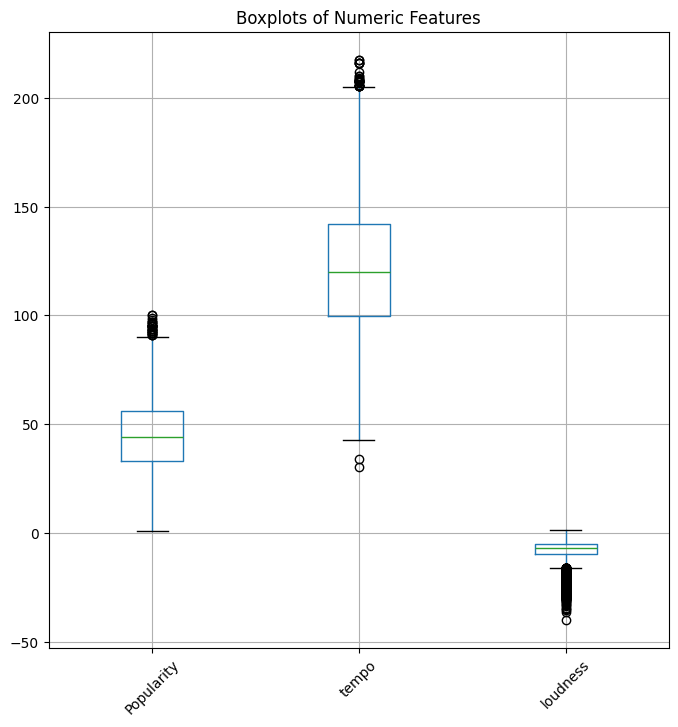

<Figure size 640x480 with 0 Axes>

In [69]:
M[["Popularity","tempo",'loudness']].boxplot(figsize=(8,8))
plt.xticks(rotation=45)
plt.title('Boxplots of Numeric Features')
plt.show()
plt.clf()

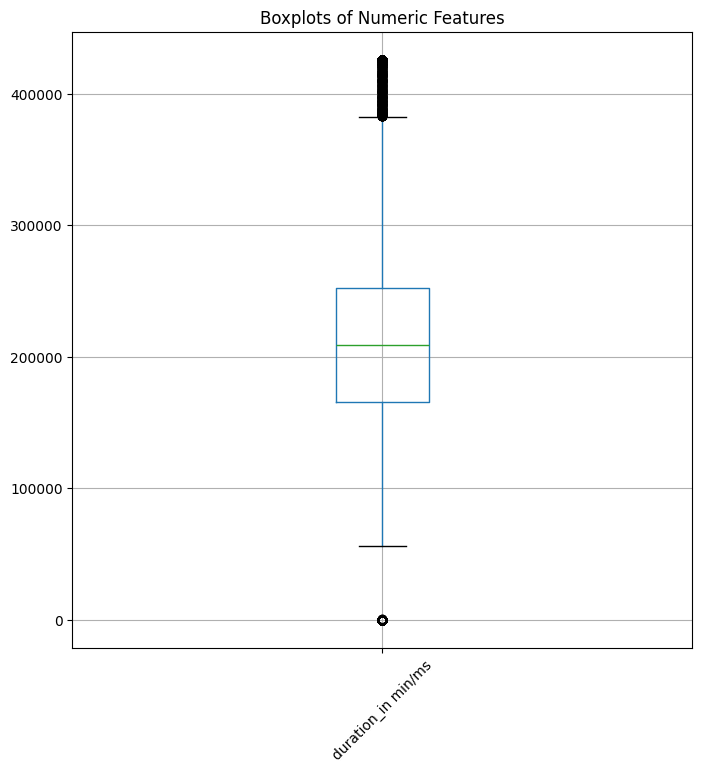

<Figure size 640x480 with 0 Axes>

In [70]:
M[["duration_in min/ms"]].boxplot(figsize=(8,8))
plt.xticks(rotation=45)
plt.title('Boxplots of Numeric Features')
plt.show()
plt.clf()

BASIC EDA - Correlations between features (num) and checking mutual information to remove multicollinearity 

            Deriving new features and checking correlations and such
            
            Using Wrapper Methods to find the best set of features after model evaluation? (after small revision)

            Applying regulariztion during model fitting? (after small revision)

            Dealing with the categorical features (encoding)

In [71]:
M_copy = M.copy()
M_num = M_copy.select_dtypes(include=np.number)
correlation_matrix = M_num.corr()
# correlation_matrix['Class'].sort_values(ascending = False) # Note: the target is non-binary categorical ---> not as effective

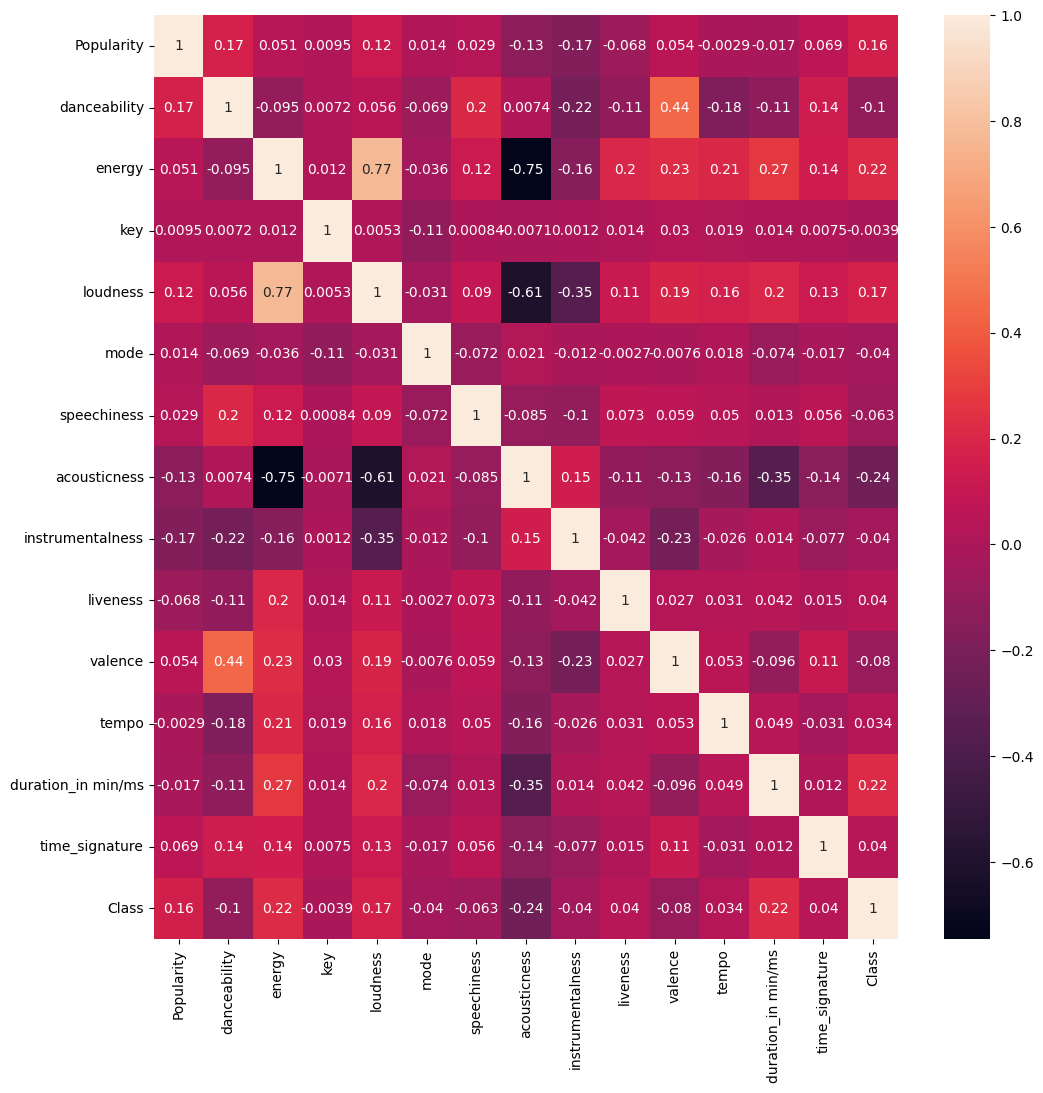

<Figure size 640x480 with 0 Axes>

In [72]:
plt.figure(figsize = (12,12))
sns.heatmap(correlation_matrix,annot = True)
plt.show()
plt.clf()

Correlations (> 0.7) and (-0.7>) is an indication of multicollinearity. Multicollinearity means strongly correlated features that provide redundant data to the model increasing complexity while not gaining any significant info.

acousticness/ energy ---> -0.76 strongly negative correlated features

loudness/ energy ---> 0.79 strongly positive correlated features

Mutual Information could  be used to extract how features relate to the target variable, but for now I just remove energy and inspect the correlation matrix once more.

In [73]:
M_copy = M_copy.drop("energy",axis=1)
M_num = M_copy.select_dtypes(include=np.number)
correlation_matrix = M_num.corr()
# correlation_matrix['Class'].sort_values(ascending = False) # Note: the target is non-binary categorical ---> not as effective

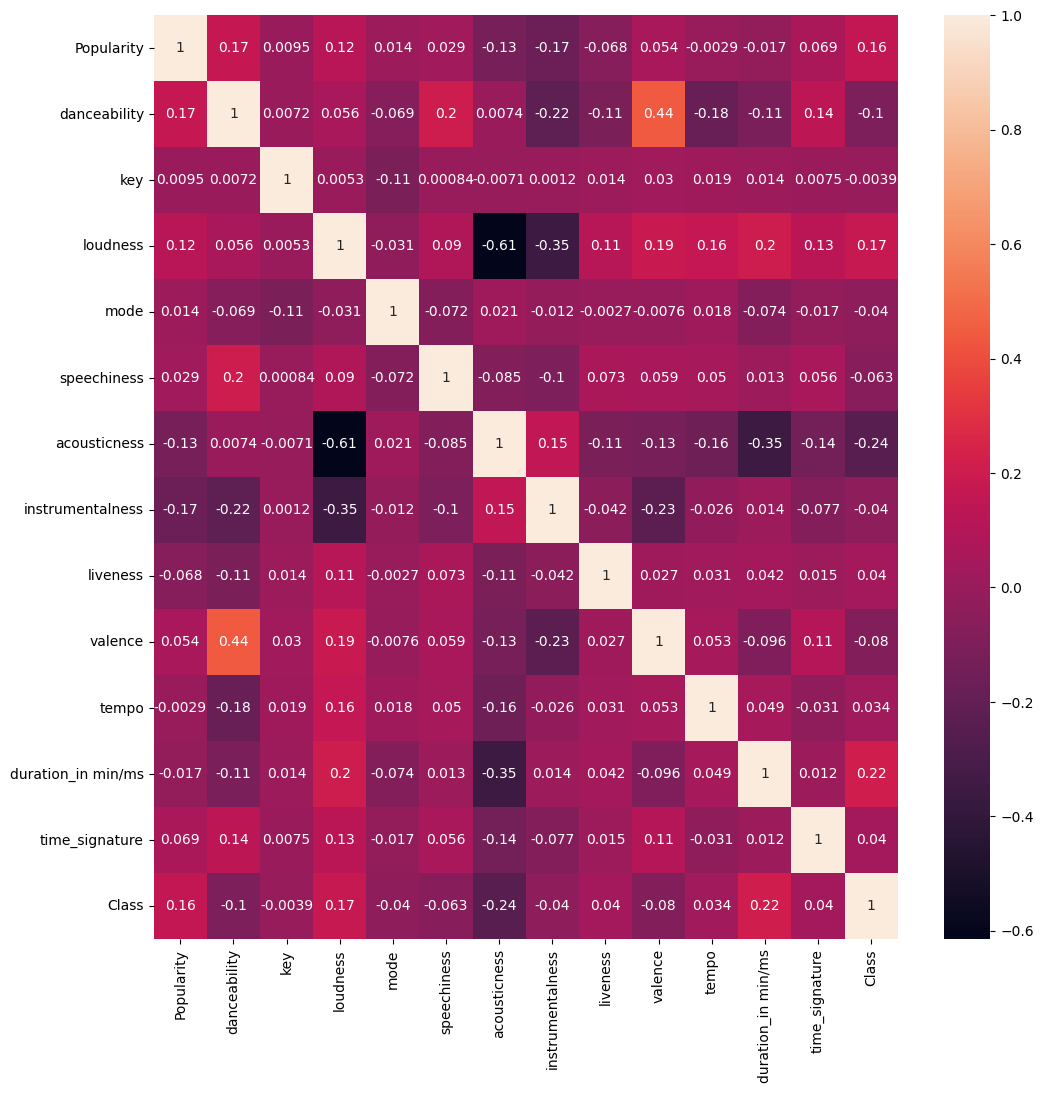

<Figure size 640x480 with 0 Axes>

In [74]:
plt.figure(figsize = (12,12))
sns.heatmap(correlation_matrix,annot = True)
plt.show()
plt.clf()

Assuming that after the removal of energy that assumed threshold for redundant data was (|0.7|), this could positively affect our final model going forward 

In [75]:
M_copy['Class'] = M_copy['Class'].astype('object')
M_copy['mode'] = M_copy['mode'].astype('object')

M_str = M_copy.select_dtypes(include=object)
M_str.head()

,Artist Name,Track Name,mode,Class
0,Marina Maximilian,Not Afraid,0,9
1,The Black Keys,Howlin' for You,1,6
2,Royal & the Serpent,phuck u,1,10
3,Detroit Blues Band,Missing You,1,2
4,Coast Contra,My Lady,0,5


In [76]:
# chi-2 statistic for categorical variables association

from scipy.stats import chi2_contingency

def chi2_statistic(df,target):
    chi2_dict = {}
    for col in df.drop(target,axis=1).columns:
        cross_tabulation = pd.crosstab(df[col],df[target])
        chi2,p,_,_ = chi2_contingency(cross_tabulation)
        chi2_dict[col] = p
    return chi2_dict        

In [77]:
chi2_statistic(M_str,"Class")

{'Artist Name': np.float64(0.0),
 'Track Name': np.float64(3.901223630612874e-23),
 'mode': np.float64(9.040655067533138e-66)}

Chi-square statistic showcases that all categorical variables are significantly associated with the tagert variable

Categorical variable encoding 

Since Class and Mode are already represented by the datatype (int) , we need to encode Artist Name and Track Name. However, due to the high cardinality presented (presumebly all unique names) 


OHE would increase the dimensionality, thus the computational burden ----> Frequency Encoding or Binary Encoding will be used instead for simplicity and dimensionality preservance (https://letsdatascience.com/frequency-encoding/)

In [78]:
# Something like this
# for col in ['Artist Name', 'Track Name']:
#     freq_encoding = M_copy[col].value_counts(normalize = True)
#     M_copy[col] = M_copy[col].map(freq_encoding)

# Highlights: 
        ''Energy'' could be omitted due to multicollinearity

        All categorical features seem to hold significant association with the taget variable

        Frequency Encoding is to be used to encode categorical features (Affects both train and test sets)

In [79]:
# M = M.drop("energy",axis = 1)
# test_set = test_set.drop("energy",axis=1)


for col in ['Artist Name', 'Track Name']:
    freq_encoding = M[col].value_counts(normalize = True)
    M[col] = M[col].map(freq_encoding)

for col in ['Artist Name', 'Track Name']:
    freq_encoding = test_set[col].value_counts(normalize = True)
    test_set[col] = test_set[col].map(freq_encoding)


# from category_encoders import BinaryEncoder

# artist_enc = BinaryEncoder(cols=['Artist Name'])
# M = pd.concat([M.drop(columns=['Artist Name']), artist_enc.fit_transform(M['Artist Name'])], axis=1)
# test_set = pd.concat([test_set.drop(columns=['Artist Name']), artist_enc.transform(test_set['Artist Name'])], axis=1)

# track_enc = BinaryEncoder(cols=['Track Name'])
# M = pd.concat([M.drop(columns=['Track Name']), track_enc.fit_transform(M['Track Name'])], axis=1)
# test_set = pd.concat([test_set.drop(columns=['Track Name']), track_enc.transform(test_set['Track Name'])], axis=1)


# from sklearn.preprocessing import LabelEncoder

# # create encoder
# encoder = LabelEncoder()

# # create new variable with assigned numbers
# M['Artist Name'] = encoder.fit_transform(M['Artist Name'])
# test_set['Artist Name'] = encoder.transform(test_set['Artist Name'])

# # create encoder
# encoder = LabelEncoder()

# # create new variable with assigned numbers
# M['Track Name'] = encoder.fit_transform(M['Track Name'])
# test_set['Track Name'] = encoder.transform(test_set['Track Name'])

# from category_encoders import HashingEncoder

# hash_enc = HashingEncoder(cols=['Artist Name', 'Track Name'], n_components=10)
# M = hash_enc.fit_transform(M)
# test_set = hash_enc.transform(test_set)

# from category_encoders import TargetEncoder

# target_enc = TargetEncoder(cols=['Artist Name', 'Track Name'])
# M[['Artist Name', 'Track Name']] = target_enc.fit_transform(M[['Artist Name', 'Track Name']], M['Class'])
# test_set[['Artist Name', 'Track Name']] = target_enc.transform(test_set[['Artist Name', 'Track Name']])



In [80]:
M.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0.000417,0.000069,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,0.00392,0.106,0.235,152.429,204947.0,4,9
1,0.001250,0.000139,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.04680,0.104,0.380,132.921,191956.0,4,6
2,0.000139,0.000069,44.0,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.63500,0.284,0.635,159.953,161037.0,4,10
3,0.000069,0.000069,12.0,0.515,0.308,6.0,-14.711,1,0.0312,0.907000,0.02130,0.300,0.501,172.472,298093.0,3,2
4,0.000139,0.000069,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,0.00392,0.211,0.619,88.311,254145.0,4,5


In [81]:
M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         14396 non-null  float64
 1   Track Name          14396 non-null  float64
 2   Popularity          14396 non-null  float64
 3   danceability        14396 non-null  float64
 4   energy              14396 non-null  float64
 5   key                 14396 non-null  float64
 6   loudness            14396 non-null  float64
 7   mode                14396 non-null  int64  
 8   speechiness         14396 non-null  float64
 9   acousticness        14396 non-null  float64
 10  instrumentalness    14396 non-null  float64
 11  liveness            14396 non-null  float64
 12  valence             14396 non-null  float64
 13  tempo               14396 non-null  float64
 14  duration_in min/ms  14396 non-null  float64
 15  time_signature      14396 non-null  int64  
 16  Clas

In [82]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  3600 non-null   int64  
 1   Artist Name         3600 non-null   float64
 2   Track Name          3600 non-null   float64
 3   Popularity          3600 non-null   float64
 4   danceability        3600 non-null   float64
 5   energy              3600 non-null   float64
 6   key                 3600 non-null   float64
 7   loudness            3600 non-null   float64
 8   mode                3600 non-null   int64  
 9   speechiness         3600 non-null   float64
 10  acousticness        3600 non-null   float64
 11  instrumentalness    3600 non-null   float64
 12  liveness            3600 non-null   float64
 13  valence             3600 non-null   float64
 14  tempo               3600 non-null   float64
 15  duration_in min/ms  3600 non-null   float64
 16  time_s

Machine Learning section

            Classification - Checking cross-validation for base estimators (Log Reg) (Decision Trees) and then apply bagging or boosting as ensemble methods?

                            using random forest , Gradient Boosting and XGboost algo

                            make the submission before saturday

In [83]:
from sklearn.linear_model import LogisticRegression # Base Estimator
from sklearn.tree import DecisionTreeClassifier # Base Estimator
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier #Possible ensemble methods
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler # To scale features (Z-score scaling)
# from sklearn.feature_selection import SequentialFeatureSelector # Feature Engineering wrapper method
import xgboost as xgb

In [84]:
X = M.drop("Class",axis=1)
y = M["Class"]

scaler = StandardScaler() # Same scaler object should be used to scale test?
X_s = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_s,y,test_size=0.2,random_state=42,stratify=y)

In [85]:
base_estimators = {
    "Logistic Regression (L2)": LogisticRegression(penalty='l2', max_iter=1000),  # L2 regularization (default implementation) 
    "Logistic Regression (L1)": LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000),  # L1 regularization
    "Logistic Regression (ElasticNet)": LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', max_iter=1000),  # ElasticNet (mix of L1 and L2)
    "Decision Tree": DecisionTreeClassifier()
}

def evalute_models(base_estimators,X_train,y_train,fold = 10):
    results = {}
    for name, estimator in base_estimators.items():
        cv_scores = cross_val_score(estimator, X_train, y_train, scoring="f1_macro", cv=fold)
        results[name] = (cv_scores.mean(), cv_scores.std())
        print(f"{name} Accuracy: {cv_scores.mean()} ± {cv_scores.std()}")

In [86]:
evalute_models(base_estimators,X_train,y_train)

Logistic Regression Accuracy: 0.5402150257523118 ± 0.016347342583158325
Logistic Regression (L2) Accuracy: 0.5402150257523118 ± 0.016347342583158325
Logistic Regression (L1) Accuracy: 0.5291390199008701 ± 0.014537858764270793
Logistic Regression (ElasticNet) Accuracy: 0.540897687832113 ± 0.016106692055510106
Decision Tree Accuracy: 0.47169598810236313 ± 0.01652201019674067


In [87]:
evalute_models(base_estimators,X_test,y_test)

Logistic Regression Accuracy: 0.5403021050316857 ± 0.027789375841078226
Logistic Regression (L2) Accuracy: 0.5403021050316857 ± 0.027789375841078226
Logistic Regression (L1) Accuracy: 0.5350064355393008 ± 0.020986633704655804
Logistic Regression (ElasticNet) Accuracy: 0.5404888801005415 ± 0.03018122970521923
Decision Tree Accuracy: 0.44026280943381996 ± 0.0324413159233937


In [88]:
bagging_dt = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, max_features = 11)
bagging_lr = BaggingClassifier(LogisticRegression(max_iter=1000), n_estimators = 100, max_features = 11)


b_e = {"bagging with decision trees":bagging_dt,
       "bagging with logistic regression":bagging_lr}

evalute_models(b_e,X_train,y_train)

bagging with decision trees Accuracy: 0.5787181076460544 ± 0.016423994729398445
bagging with logistic regression Accuracy: 0.5312752803394275 ± 0.01572085845511528


In [89]:
evalute_models(b_e,X_test,y_test) # Should be for the validation set

bagging with decision trees Accuracy: 0.5444133931066901 ± 0.028466642237957463
bagging with logistic regression Accuracy: 0.528837243076415 ± 0.026762413711933972


In [90]:
models_to_stack = [
    ('logistic', LogisticRegression(max_iter=1000)),
    ('decision_tree', DecisionTreeClassifier())
]


stacking_clf = StackingClassifier(
    estimators=models_to_stack,
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42)
)

stacking_scores = cross_val_score(stacking_clf, X_train, y_train, scoring='f1_macro', cv=10)
print(f"Stacking Model F1 Score: {stacking_scores.mean()} ± {stacking_scores.std()}")


Stacking Model F1 Score: 0.5572425610566683 ± 0.014882950455348133


In [91]:
stacking_scores = cross_val_score(stacking_clf, X_test, y_test, scoring='f1_macro', cv=10)
print(f"Stacking Model F1 Score: {stacking_scores.mean()} ± {stacking_scores.std()}")

Stacking Model F1 Score: 0.5350170821158451 ± 0.03105568348469736


In [92]:

ensemble_models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, random_state=42)
}


evalute_models(ensemble_models, X_train, y_train)

Random Forest Accuracy: 0.5860830129184643 ± 0.01918245693127195
Gradient Boosting Accuracy: 0.5911044430080148 ± 0.024363218505770393
XGBoost Accuracy: 0.5978754225797722 ± 0.01401251363890325


In [93]:
evalute_models(ensemble_models, X_test, y_test)

Random Forest Accuracy: 0.5539211795630259 ± 0.018584751241565937
Gradient Boosting Accuracy: 0.5280543044434988 ± 0.026733638428386126
XGBoost Accuracy: 0.5560646261524702 ± 0.033795026585814


In [95]:
from sklearn.metrics import f1_score

xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,  # Added to avoid warnings related to label encoding
    eval_metric='mlogloss'    # Added to specify a default evaluation metric
)


param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1_macro',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1-score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Test F1-score: {f1}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:37:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1}
Best F1-score: 0.613644519811765
Test F1-score: 0.6164952370226712


In [96]:
test_set_scaled = scaler.transform(test_set.drop("Id",axis=1)) #same scalar object
# Predict using the best model on the scaled test set features
final_predictions = best_model.predict(test_set_scaled)


full_test = test_set.copy()
full_test['Class'] = final_predictions
full_test.rename(columns={'Id':'Id'}, inplace=True)
full_test.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,14397,0.000278,0.000278,44.0,0.691,0.670,2.0,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4,1
1,14398,0.000278,0.000278,14.0,0.461,0.777,2.0,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4,6
2,14399,0.000278,0.000278,80.0,0.656,0.291,2.0,-10.572,1,0.0293,0.872000,0.003920,0.1140,0.298,103.971,232533.0,4,9
3,14400,0.000278,0.000278,52.0,0.480,0.826,6.0,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4,10
4,14401,0.000556,0.000278,23.0,0.734,0.729,1.0,-6.381,0,0.2830,0.147000,0.003920,0.0672,0.805,76.030,118439.0,4,6


In [97]:
full_test[['Id','Class']].to_csv('M_Genre_Submission_15th_August(2).csv', index=False)